In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [6]:
wine_red= pd.read_csv('wine\winequality-red.csv', sep=";")
wine_white= pd.read_csv('wine\winequality-white.csv', sep=";")

wine_white = wine_white.assign(wine=0)
wine_white = wine_white.drop(range(1600,4898),axis=0)
wine_red = wine_red.assign(wine=1)

wines = pd.concat([wine_red, wine_white])
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.4,0.27,0.49,7.3,0.046,53.0,206.0,0.9956,3.24,0.43,9.2,6,0
1596,6.6,0.55,0.01,2.7,0.034,56.0,122.0,0.9906,3.15,0.30,11.9,5,0
1597,6.4,0.27,0.49,7.3,0.046,53.0,206.0,0.9956,3.24,0.43,9.2,6,0
1598,6.3,0.24,0.74,1.4,0.172,24.0,108.0,0.9932,3.27,0.39,9.9,6,0


In [7]:
wines.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine                    0
dtype: int64

In [8]:
wines.groupby('wine').size()

wine
0    1600
1    1599
dtype: int64

C:\Users\afede\AppData\Local\Temp\ipykernel_12700\264721491.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  wines.drop(['wine'],1).hist()


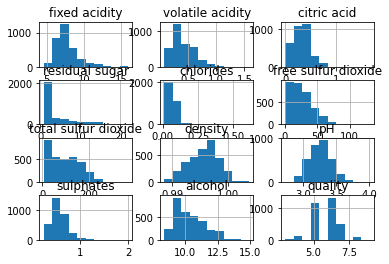

In [9]:
wines.drop(['wine'],1).hist()
plt.show()

In [15]:
X = np.array(wines.drop(['wine'],1))
y = np.array(wines['wine'])
X.shape

C:\Users\afede\AppData\Local\Temp\ipykernel_12700\1230688312.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(wines.drop(['wine'],1))


(3199, 12)

In [16]:
model = linear_model.LogisticRegression(max_iter=10000)
model.fit(X,y)

LogisticRegression(max_iter=10000)

In [17]:
predictions = model.predict(X)
predictions[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [18]:
model.score(X,y)

0.9806189434198187

In [29]:
validation_size = 0.35
seed = 8
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [30]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
msg

'Logistic Regression: 0.977878 (0.011614)'

In [31]:
predictions = model.predict(X_train)
print(accuracy_score(Y_train, predictions))

0.9788359788359788


In [32]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.9839285714285714


In [33]:
print(confusion_matrix(Y_validation, predictions))

[[553  10]
 [  8 549]]


In [34]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       563
           1       0.98      0.99      0.98       557

    accuracy                           0.98      1120
   macro avg       0.98      0.98      0.98      1120
weighted avg       0.98      0.98      0.98      1120



In [35]:
X_new = pd.DataFrame({"fixed acidity":[8.5],"volatile acidity":[1.2],"citric acid":[0.4],"residual sugar":[1.2],"chlorides":[0.02],"free sulfur dioxide":[10],"total sulfur dioxide":[30],"density":[0.9915],"pH":[3.2],"sulphates":[0.7],"alcohol":[9.5],"quality":[4]})
model.predict(X_new)

c:\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1], dtype=int64)

In [36]:
blanco_reales= pd.read_csv('wine\winequality-white-noused.csv', sep=";")

predict = model.predict(blanco_reales)


c:\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [37]:


array = predict

unique, counts = np.unique(array, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)




[[   0 3252]
 [   1   47]]
